# Intro

## Librerías

In [1]:
# Data
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Import/Export
import pickle
import joblib

## Representación Gráfica

### Pruebas

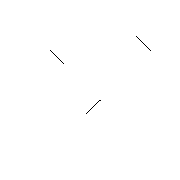

In [2]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Colorear el píxel en escala de grises
                gray_image[py, px] = 0  # Negro
                # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth
antennas = [((50, 50), 45), ((100, 100), 135), ((150, 50), 225)]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 20  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


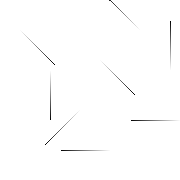

In [3]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                intensity = int(255 * (1 - i / attenuation))  # Atenuación gradual

                # Colorear el píxel en escala de grises
                gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth

antennas = [
    ((20, 30), 45),   # Antena 1
    ((50, 70), 90),   # Antena 2
    ((80, 110), 135), # Antena 3
    ((110, 150), 180),# Antena 4
    ((140, 30), 225), # Antena 5
    ((170, 70), 270), # Antena 6
    ((200, 110), 315),# Antena 7
    ((230, 150), 0),  # Antena 8
    ((100, 60), 45),  # Antena 9
    ((180, 120), 180) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


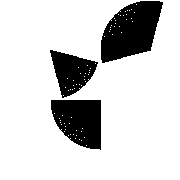

In [4]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = 0  # Negro
                    # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((50, 50), 45, 30),   # Antena 1
    ((100, 100), 135, 45),   # Antena 2
    ((150, 50), 225, 60)   # Antena 3
    # Puedes agregar más antenas según sea necesario
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


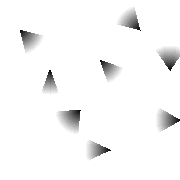

In [5]:
def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((20, 30), 45, 30),   # Antena 1
    ((50, 70), 90, 20),   # Antena 2
    ((80, 110), 135, 40), # Antena 3
    ((110, 150), 180, 25),# Antena 4
    ((140, 30), 225, 30), # Antena 5
    ((170, 70), 270, 35), # Antena 6
    ((200, 110), 315, 20),# Antena 7
    ((230, 150), 0, 45),  # Antena 8
    ((100, 60), 45, 25),  # Antena 9
    ((180, 120), 180, 30) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 25  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


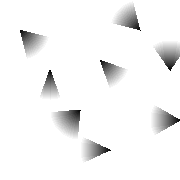

In [6]:
def draw_antennas(image, antenna_data, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Parsear la información de las antenas
    antennas = parse_antennas(antenna_data)

    # Iterar sobre las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

def parse_antennas(antenna_list):
    antennas = []
    for i in range(0, len(antenna_list), 4):
        x = antenna_list[i]
        y = antenna_list[i + 1]
        azimuth = antenna_list[i + 2]
        amplitude = antenna_list[i + 3]
        antennas.append(((x, y), azimuth, amplitude))
    return antennas

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Lista de antenas en formato cíclico (x, y, azimuth, amplitud)
antenna_data = [
    20, 30, 45, 30,
    50, 70, 90, 20,
    80, 110, 135, 40,
    110, 150, 180, 25,
    140, 30, 225, 30,
    170, 70, 270, 35,
    200, 110, 315, 20,
    230, 150, 0, 45,
    100, 60, 45, 25,
    180, 120, 180, 30
]

# Definir la atenuación
attenuation = 30  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antenna_data, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)



## Arrays

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_and_preprocess_images(image_paths, target_size=(180, 180)):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=target_size)  # Cargar imagen y redimensionar
        img_array = img_to_array(img)  # Convertir imagen a array NumPy
        images.append(img_array)

    # Convertir lista de arrays a un array 4D
    input_data = np.array(images)
    return input_data

# Ejemplo de uso
image_paths = ["path_to_image1.png", "path_to_image2.png", ..., "path_to_image10.png"]
input_data = load_and_preprocess_images(image_paths)

print(input_data.shape)
# Salida esperada: (10, 180, 180, 4)


In [10]:
import numpy as np

# Crear un array 3x3x4 con valores específicos para cada canal
image_example = np.array([
    [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]],   # Primera fila
    [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]], # Segunda fila
    [[24, 25, 26, 27], [28, 29, 30, 31], [32, 33, 34, 35]]  # Tercera fila
])

print(image_example.shape)
# Salida esperada: (3, 3, 4)

print(image_example)
# Salida esperada:
# [[[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]]
#
#  [[12 13 14 15]
#   [16 17 18 19]
#   [20 21 22 23]]
#
#  [[24 25 26 27]
#   [28 29 30 31]
#   [32 33 34 35]]]


(3, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]]


In [11]:
import numpy as np

# Crear el degradado diagonal para cada canal
c_channel = np.array([
    [0, 0, 0],
    [0, 127, 0],
    [0, 0, 255]
])

m_channel = np.array([
    [0, 0, 0],
    [0, 127, 0],
    [0, 0, 255]
])

y_channel = np.array([
    [0, 0, 0],
    [0, 127, 0],
    [0, 0, 255]
])

k_channel = np.array([
    [0, 0, 0],
    [0, 127, 0],
    [0, 0, 255]
])

# Combinar los canales en una sola imagen 3x3x4
image_example = np.stack((c_channel, m_channel, y_channel, k_channel), axis=-1)

print(image_example.shape)
# Salida esperada: (3, 3, 4)

print(image_example)
# Salida esperada:
# [[[  0   0   0   0]
#   [  0   0   0   0]
#   [  0   0   0   0]]
#
#  [[  0   0   0   0]
#   [127 127 127 127]
#   [  0   0   0   0]]
#
#  [[  0   0   0   0]
#   [  0   0   0   0]
#   [255 255 255 255]]]


(3, 3, 4)
[[[  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [127 127 127 127]
  [  0   0   0   0]]

 [[  0   0   0   0]
  [  0   0   0   0]
  [255 255 255 255]]]


In [12]:
import numpy as np

# Crear valores para cada canal
c_channel = np.array([
    [0, 85, 170],
    [0, 85, 170],
    [0, 85, 170]
])

m_channel = np.array([
    [0, 0, 0],
    [85, 85, 85],
    [170, 170, 170]
])

y_channel = np.array([
    [0, 0, 255],
    [0, 127, 0],
    [255, 0, 0]
])

k_channel = np.array([
    [64, 64, 64],
    [128, 128, 128],
    [192, 192, 192]
])

# Combinar los canales en una sola imagen 3x3x4
image_example = np.stack((c_channel, m_channel, y_channel, k_channel), axis=-1)

print(image_example.shape)
# Salida esperada: (3, 3, 4)

print(image_example)
# Salida esperada:
# [[[  0   0   0  64]
#   [ 85   0   0  64]
#   [170   0 255  64]]
#
#  [[  0  85   0 128]
#   [ 85  85 127 128]
#   [170  85   0 128]]
#
#  [[  0 170 255 192]
#   [ 85 170   0 192]
#   [170 170   0 192]]]


(3, 3, 4)
[[[  0   0   0  64]
  [ 85   0   0  64]
  [170   0 255  64]]

 [[  0  85   0 128]
  [ 85  85 127 128]
  [170  85   0 128]]

 [[  0 170 255 192]
  [ 85 170   0 192]
  [170 170   0 192]]]


# CNN

In [7]:
def build_model(image_height=180, image_width=180, num_channels=4):
    input_shape = (image_height, image_width, num_channels)
    inputs = Input(shape=input_shape)

    # Primera capa convolucional
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Segunda capa convolucional
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Tercera capa convolucional
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Cuarta capa convolucional
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)

    # Capa completamente conectada
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Capa de salida con 3 unidades (R1, R2, R3)
    outputs = Dense(3, activation='linear')(x)

    model = Model(inputs, outputs)

    return model

In [8]:
# Ejemplo de cómo construir el modelo con diferentes parámetros
model = build_model(image_height=180, image_width=180, num_channels=4)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 90, 90, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0     